  Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl (920 kB)
Note: you may need to restart the kernel to use updated packages.


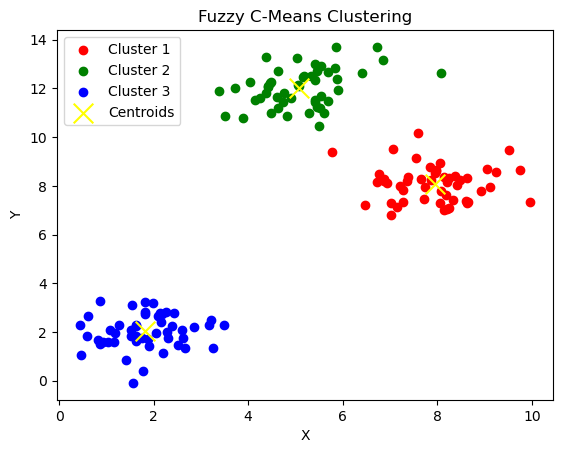

Cluster Centers:
[[ 7.95740703  8.05995165]
 [ 5.08439017 12.00733978]
 [ 1.81719058  2.01956605]]


In [ ]:

%pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


np.random.seed(42)
x1 = np.random.normal(loc=2, scale=0.8, size=50)
y1 = np.random.normal(loc=2, scale=0.8, size=50)

x2 = np.random.normal(loc=8, scale=0.8, size=50)
y2 = np.random.normal(loc=8, scale=0.8, size=50)

x3 = np.random.normal(loc=5, scale=0.8, size=50)
y3 = np.random.normal(loc=12, scale=0.8, size=50)


x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
data = np.vstack((x, y))


n_clusters = 3


cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,              
    c=n_clusters,           
    m=2.0,                  
    error=0.005,            
    maxiter=1000,           
    init=None,              
    seed=42                 
)




cluster_membership = np.argmax(u, axis=0)


colors = ['r', 'g', 'b']
for i in range(n_clusters):
    plt.scatter(data[0, cluster_membership == i], 
                data[1, cluster_membership == i], 
                color=colors[i], label=f'Cluster {i+1}')
    

plt.scatter(cntr[:, 0], cntr[:, 1], c='yellow', s=200, marker='x', label='Centroids')
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


print("Cluster Centers:")
print(cntr)
